##  Smart Agent Data Analysis

##### IMPORTING

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')
import csv
import datetime
import math

In [ ]:
# Importing data
dataset = pd.read_csv('agent_recruitment.csv')


##### MISSING VALUE TREATMENT

In [ ]:
dataset.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [ ]:
dataset.shape

(9527, 23)

In [ ]:
dataset.dropna(subset = ['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation','Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB','Manager_Num_Application','Manager_Num_Coded','Manager_Business','Manager_Num_Products','Manager_Business2','Manager_Num_Products2' ], inplace = True)

In [ ]:
dataset.shape

(8844, 23)

In [ ]:
dataset.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               80
Applicant_Gender                 53
Applicant_BirthDate              59
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_DOJ                       0
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_DoB                       0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [ ]:
dataset.Applicant_Occupation.fillna("Others",inplace=True)
dataset.Applicant_Marital_Status.fillna("applicantMaritalStatusMissing",inplace=True)
dataset.Applicant_Gender.fillna("applicantGenderMissing",inplace=True)
dataset.Applicant_Qualification.fillna("Others",inplace=True)

In [ ]:
dataset.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             80
Applicant_Gender                0
Applicant_BirthDate            59
Applicant_Marital_Status        0
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation     0
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
Business_Sourced                0
dtype: int64

##### FEATURE ENGINEERING

In [ ]:
dataset['Manager_Joining_Designation']=dataset['Manager_Joining_Designation'].map(lambda x:float(str(x)[-1]) if (str(x)[-1]!='n')& (str(x)[-1]!='r') else float('nan'))
dataset['Manager_Current_Designation']=dataset['Manager_Current_Designation'].map(lambda x:float(str(x)[-1]) if (str(x)[-1]!='n')& (str(x)[-1]!='r') else float('nan'))

In [ ]:
dataset['Manager_Promotion']=dataset['Manager_Current_Designation']-dataset['Manager_Joining_Designation']
dataset['PinDifference'] =abs(dataset['Office_PIN']-dataset['Applicant_City_PIN'])

In [ ]:
dateColumns = ['Manager_DoB','Manager_DOJ','Applicant_BirthDate','Application_Receipt_Date']
for colName in dateColumns:
    dataset[colName]= pd.to_datetime(dataset[colName])
dataset['applicantAge'] = ((dataset['Application_Receipt_Date']-dataset['Applicant_BirthDate'])/ np.timedelta64(1, 'D'))/365
dataset['managerExperience'] = ((dataset['Application_Receipt_Date']-dataset['Manager_DOJ'])/ np.timedelta64(1, 'D'))/365
dataset['managerAge'] =((dataset['Application_Receipt_Date']-dataset['Manager_DoB'])/ np.timedelta64(1, 'D'))/365

In [ ]:
dataset['Day']=dataset['Application_Receipt_Date'].map(lambda x : x.weekday())

In [ ]:
dataset.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             80
Applicant_Gender                0
Applicant_BirthDate            59
Applicant_Marital_Status        0
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation    58
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
Business_Sourced                0
Manager_Promotion              58
PinDifference                  80
applicantAge                   59
managerExperience               0
managerAge                      0
Day                             0
dtype: int64

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,1.0,2119.0,35.347945,1.430137,29.178082,0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,1.0,2110.0,24.175342,1.430137,29.178082,0
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,0.0,44100.0,41.273973,0.887671,38.145205,0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,2.0,0.0,19.210959,3.654795,28.690411,0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,0.0,1239.0,21.797260,0.939726,36.210959,0


In [ ]:
dataset.dtypes

ID                                     object
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                       object
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status               object
Applicant_Occupation                   object
Applicant_Qualification                object
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation           float64
Manager_Current_Designation           float64
Manager_Grade                         float64
Manager_Status                         object
Manager_Gender                         object
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [ ]:
dataset['Business_Sourced'] = dataset['Business_Sourced'].astype('category')

In [ ]:
dataset['applicantAge'].fillna(dataset['applicantAge'].median(), inplace = True)

In [ ]:
dataset['applicantAge'] = dataset['applicantAge'].astype('int64')

In [ ]:
dataset['Applicant_Age_range'] = 'str'
dataset['Applicant_Age_range'][(dataset['applicantAge']<= 40)] = 'Young Adults'
dataset['Applicant_Age_range'][(dataset['applicantAge']>40) & (dataset['applicantAge']<=60) ] = 'Middle-aged Adults'
dataset['Applicant_Age_range'][(dataset['applicantAge']>60)] = 'Old Adults'
dataset['Applicant_Age_range'] = dataset['Applicant_Age_range'].astype('category')

In [ ]:
dataset['Applicant_Age_range'].unique()

['Young Adults', 'Middle-aged Adults', 'Old Adults']
Categories (3, object): ['Young Adults', 'Middle-aged Adults', 'Old Adults']

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day,Applicant_Age_range
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,1.0,2119.0,35,1.430137,29.178082,0,Young Adults
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,1.0,2110.0,24,1.430137,29.178082,0,Young Adults
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,0.0,44100.0,41,0.887671,38.145205,0,Middle-aged Adults
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,2.0,0.0,19,3.654795,28.690411,0,Young Adults
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,0.0,1239.0,21,0.939726,36.210959,0,Young Adults


In [ ]:
dataset.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             80
Applicant_Gender                0
Applicant_BirthDate            59
Applicant_Marital_Status        0
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation    58
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
Business_Sourced                0
Manager_Promotion              58
PinDifference                  80
applicantAge                    0
managerExperience               0
managerAge                      0
Day                             0
Applicant_Age_

In [ ]:
dataset.dtypes

ID                                     object
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                       object
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status               object
Applicant_Occupation                   object
Applicant_Qualification                object
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation           float64
Manager_Current_Designation           float64
Manager_Grade                         float64
Manager_Status                         object
Manager_Gender                         object
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [ ]:
dataset['PinDifference'].fillna(dataset['PinDifference'].median(), inplace = True)

In [ ]:
dataset['PinDifference'] = dataset['PinDifference'].astype('int64')

In [ ]:
dataset['Manager_Promotion'].fillna(dataset['Manager_Promotion'].median(), inplace = True)

In [ ]:
dataset['Manager_Promotion'] = dataset['Manager_Promotion'].astype('int64')

In [ ]:
dataset['managerAge'] = dataset['managerAge'].astype('int64')

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day,Applicant_Age_range
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,1,2119,35,1.430137,29,0,Young Adults
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,1,2110,24,1.430137,29,0,Young Adults
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,0,44100,41,0.887671,38,0,Middle-aged Adults
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,2,0,19,3.654795,28,0,Young Adults
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,0,1239,21,0.939726,36,0,Young Adults


In [ ]:
dataset.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             80
Applicant_Gender                0
Applicant_BirthDate            59
Applicant_Marital_Status        0
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation    58
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
Business_Sourced                0
Manager_Promotion               0
PinDifference                   0
applicantAge                    0
managerExperience               0
managerAge                      0
Day                             0
Applicant_Age_

In [ ]:
dataset.dtypes

ID                                     object
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                       object
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status               object
Applicant_Occupation                   object
Applicant_Qualification                object
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation           float64
Manager_Current_Designation           float64
Manager_Grade                         float64
Manager_Status                         object
Manager_Gender                         object
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [ ]:
dataset.dtypes[dataset.dtypes == 'object']

ID                          object
Applicant_Gender            object
Applicant_Marital_Status    object
Applicant_Occupation        object
Applicant_Qualification     object
Manager_Status              object
Manager_Gender              object
dtype: object

In [ ]:
dataset['Applicant_Gender'] = dataset['Applicant_Gender'].astype('category')
dataset['Applicant_Marital_Status'] = dataset['Applicant_Marital_Status'].astype('category')
dataset['Applicant_Occupation'] = dataset['Applicant_Occupation'].astype('category')
dataset['Applicant_Qualification'] = dataset['Applicant_Qualification'].astype('category')
dataset['Manager_Status'] = dataset['Manager_Status'].astype('category')
dataset['Manager_Gender'] = dataset['Manager_Gender'].astype('category')


In [ ]:
dataset.dtypes[dataset.dtypes == 'int64']

Office_PIN           int64
Manager_Promotion    int64
PinDifference        int64
applicantAge         int64
managerAge           int64
Day                  int64
dtype: object

In [ ]:
dataset.dtypes[dataset.dtypes == 'float64']

Applicant_City_PIN             float64
Manager_Joining_Designation    float64
Manager_Current_Designation    float64
Manager_Grade                  float64
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
managerExperience              float64
dtype: object

In [ ]:
dataset['Manager_Grade'] = dataset['Manager_Grade'].astype('int64')
dataset['Manager_Num_Application'] = dataset['Manager_Num_Application'].astype('int64')
dataset['Manager_Num_Coded'] = dataset['Manager_Num_Coded'].astype('int64')
dataset['Manager_Num_Products'] = dataset['Manager_Num_Products'].astype('int64')
dataset['Manager_Num_Products2'] = dataset['Manager_Num_Products2'].astype('int64')
dataset['managerExperience'] = dataset['managerExperience'].astype('int64')


In [ ]:
dataset.dtypes[dataset.dtypes == 'datetime64[ns]']

Application_Receipt_Date    datetime64[ns]
Applicant_BirthDate         datetime64[ns]
Manager_DOJ                 datetime64[ns]
Manager_DoB                 datetime64[ns]
dtype: object

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day,Applicant_Age_range,Manager_Age_range,Manager_Promotion_range,WeekDay,PinDifference_range
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,0,1,2119,35,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,1,1,2110,24,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2,Confirmation,M,1969-03-03,0,0,357184.0,24,357184.0,24,0,0,44100,41,0,38,0,Middle-aged Adults,Young Adults,No Promotion,0,Stay Far away
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4,Confirmation,F,1978-08-14,0,0,318356.0,22,318356.0,22,0,2,0,19,3,28,0,Young Adults,Young Adults,Got Promotion,0,Stay Nearby
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2,Confirmation,M,1971-02-07,2,1,230402.0,17,230402.0,17,0,0,1239,21,0,36,0,Young Adults,Young Adults,No Promotion,0,Stay Far away


In [ ]:
dataset.dtypes

ID                                     object
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation           float64
Manager_Current_Designation           float64
Manager_Grade                           int64
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                    datetime64[ns]
Manager_Num_Application                 int64
Manager_Num_Coded                       int64
Manager_Business                      float64
Manager_Num_Products                    int64
Manager_Business2                     float64
Manager_Num_Products2             

In [ ]:
dataset['Manager_Age_range'] = 'str'
dataset['Manager_Age_range'][(dataset['managerAge']<= 40)] = 'Young Adults'
dataset['Manager_Age_range'][(dataset['managerAge']>40) & (dataset['managerAge']<=60) ] = 'Middle-aged Adults'
dataset['Manager_Age_range'][(dataset['managerAge']>60)] = 'Old Adults'
dataset['Manager_Age_range'] = dataset['Manager_Age_range'].astype('category')


In [ ]:
dataset['Manager_Age_range'].unique()

['Young Adults', 'Middle-aged Adults']
Categories (2, object): ['Young Adults', 'Middle-aged Adults']

In [ ]:
dataset['Manager_Promotion_range'] = 'str'
dataset['Manager_Promotion_range'][(dataset['Manager_Promotion']<= 0)] = 'No Promotion'
dataset['Manager_Promotion_range'][(dataset['Manager_Promotion']>0)] = 'Got Promotion'
dataset['Manager_Promotion_range'] = dataset['Manager_Promotion_range'].astype('category')

In [ ]:
dataset['Manager_Promotion_range'].unique()

['Got Promotion', 'No Promotion']
Categories (2, object): ['Got Promotion', 'No Promotion']

In [ ]:
dataset['WeekDay'] = dataset['Day'].astype('str')
dataset['WeekDay'] = dataset['WeekDay'].astype('category')

In [ ]:
dataset['PinDifference_range'] = 'str'
dataset['PinDifference_range'][(dataset['PinDifference']<= 29)] = 'Stay Nearby'
dataset['PinDifference_range'][(dataset['PinDifference']>29)] = 'Stay Far away'
dataset['PinDifference_range'] = dataset['PinDifference_range'].astype('category')

In [ ]:
dataset['PinDifference_range'].unique()

['Stay Far away', 'Stay Nearby']
Categories (2, object): ['Stay Far away', 'Stay Nearby']

In [ ]:
dataset['managerExperience_range'] = 'str'
dataset['managerExperience_range'][(dataset['managerExperience']<= 1)] = 'Less Experience'
dataset['managerExperience_range'][(dataset['managerExperience']>1)] = 'More  Experience'
dataset['managerExperience_range'] = dataset['managerExperience_range'].astype('category')

In [ ]:
dataset['managerExperience_range'].unique()

['Less Experience', 'More  Experience']
Categories (2, object): ['Less Experience', 'More  Experience']

In [ ]:
dataset['Manager_Business_range'] = 'str'
dataset['Manager_Business_range'][(dataset['Manager_Business']<= 102178)] = 'Less Business'
dataset['Manager_Business_range'][(dataset['Manager_Business']>102178)] = 'More  Business'
dataset['Manager_Business_range'] = dataset['Manager_Business_range'].astype('category')

In [ ]:
dataset['Manager_Business_range'].unique()

['More  Business', 'Less Business']
Categories (2, object): ['More  Business', 'Less Business']

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day,Applicant_Age_range,Manager_Age_range,Manager_Promotion_range,WeekDay,PinDifference_range,managerExperience_range,Manager_Business_range
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,0,1,2119,35,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away,Less Experience,More Business
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,1,1,2110,24,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away,Less Experience,More Business
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2,Confirmation,M,1969-03-03,0,0,357184.0,24,357184.0,24,0,0,44100,41,0,38,0,Middle-aged Adults,Young Adults,No Promotion,0,Stay Far away,Less Experience,More Business
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4,Confirmation,F,1978-08-14,0,0,318356.0,22,318356.0,22,0,2,0,19,3,28,0,Young Adults,Young Adults,Got Promotion,0,Stay Nearby,More Experience,More Business
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2,Confirmation,M,1971-02-07,2,1,230402.0,17,230402.0,17,0,0,1239,21,0,36,0,Young Adults,Young Adults,No Promotion,0,Stay Far away,Less Experience,More Business


### UNIVARIATE ANALYSIS

#### 1. NUMERICAL VARIABLES

In [ ]:
manager = ['Manager_Grade','Manager_Num_Application','Manager_Num_Coded']
age=['applicantAge','managerAge']
mangerperf=['Manager_Num_Products','Manager_Business']

In [ ]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

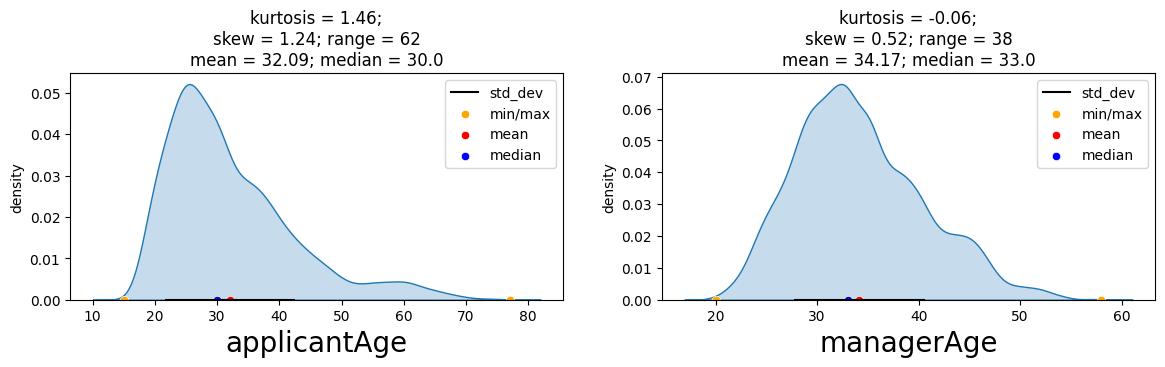

In [ ]:
UVA_KDE(dataset,age)

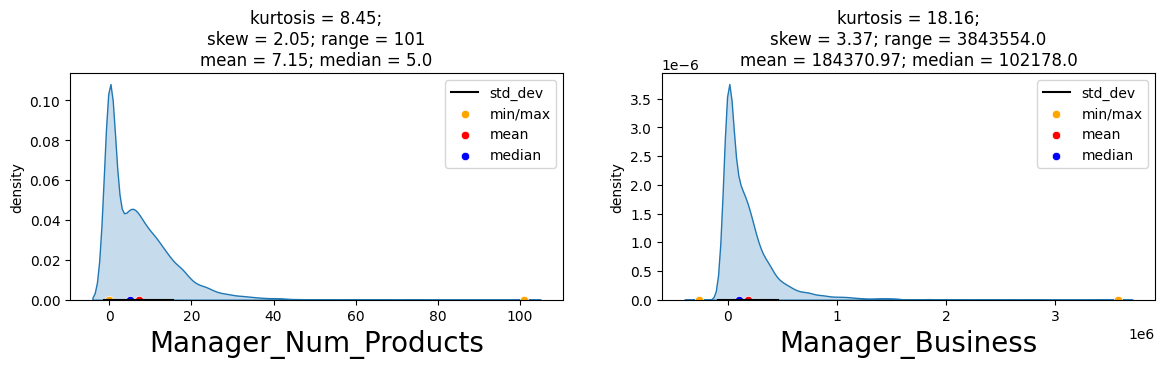

In [ ]:
UVA_KDE(dataset,mangerperf)

In [ ]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))



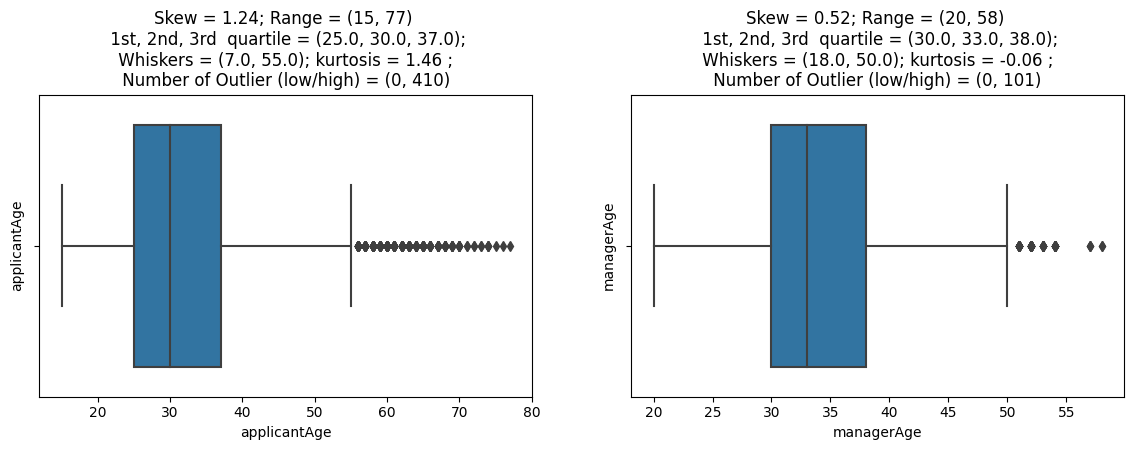

In [ ]:
UVA_boxplot(dataset,age)

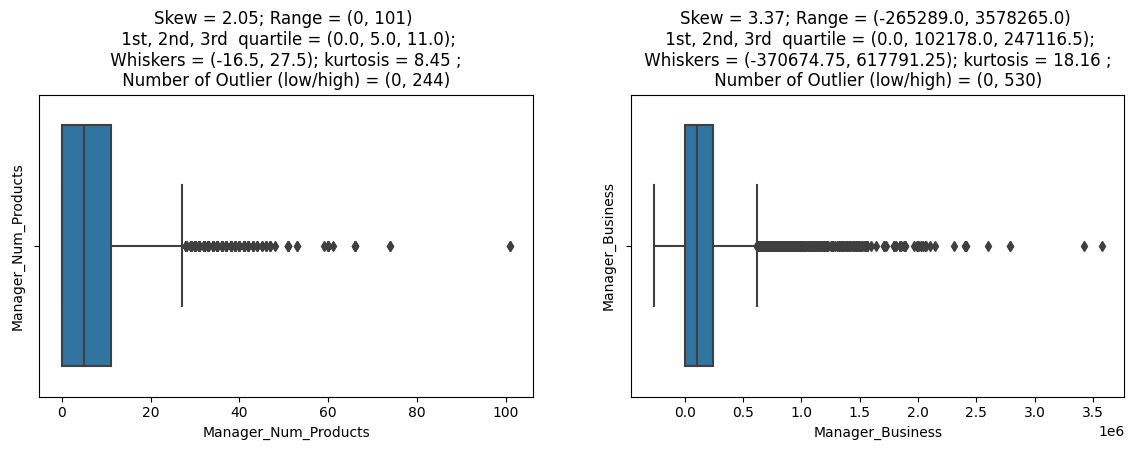

In [ ]:
UVA_boxplot(dataset,mangerperf)

#### 2. CATEGORICAL VARIABLES

In [ ]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (8*size,6), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

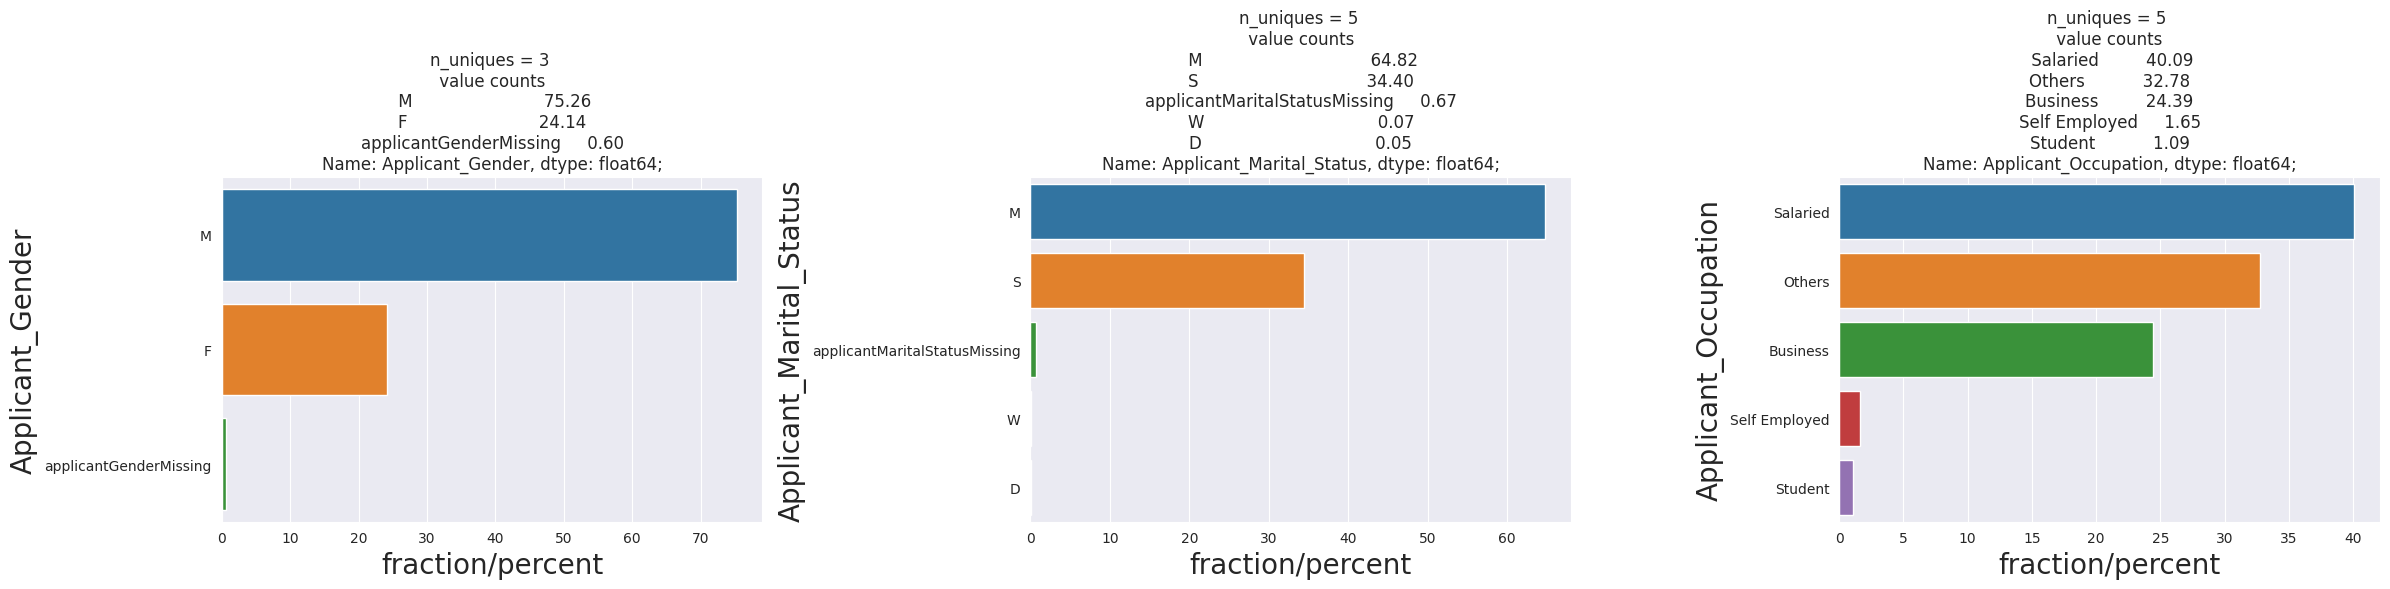

In [ ]:
UVA_category(dataset, ['Applicant_Gender', 'Applicant_Marital_Status','Applicant_Occupation'])

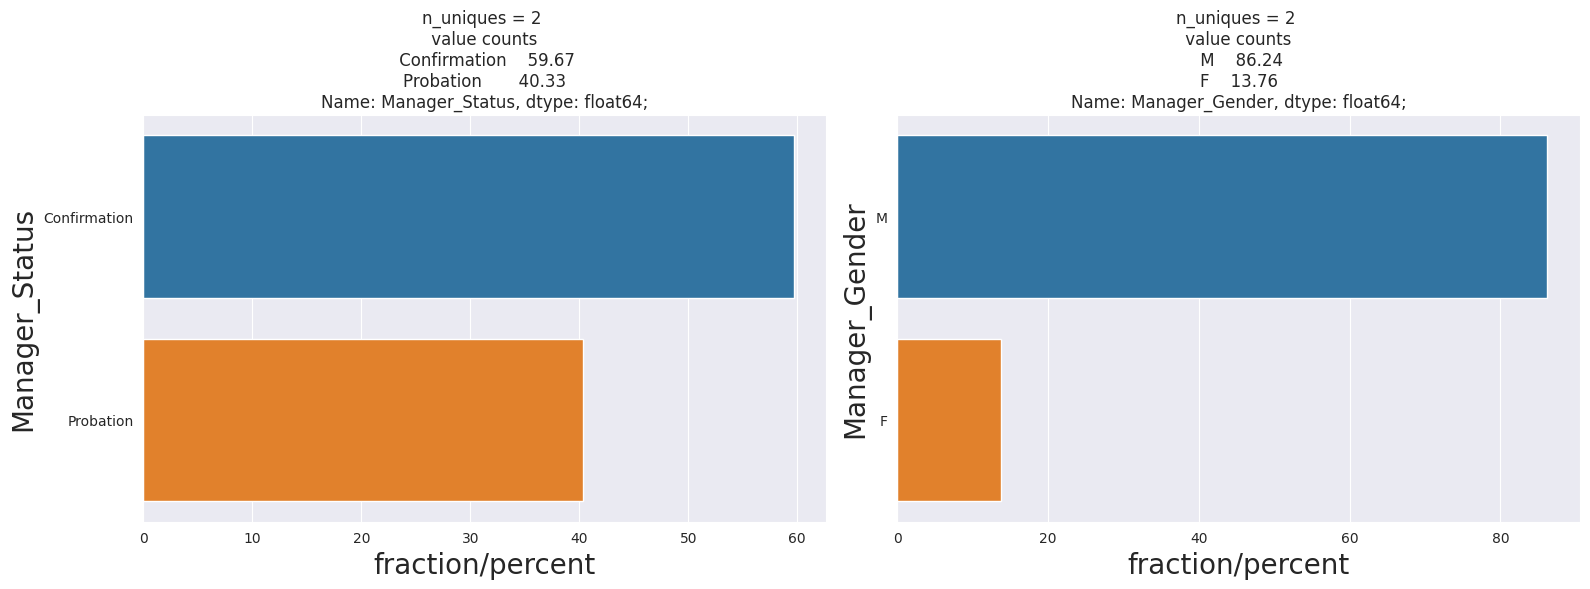

In [ ]:
UVA_category(dataset, ['Manager_Status','Manager_Gender'])

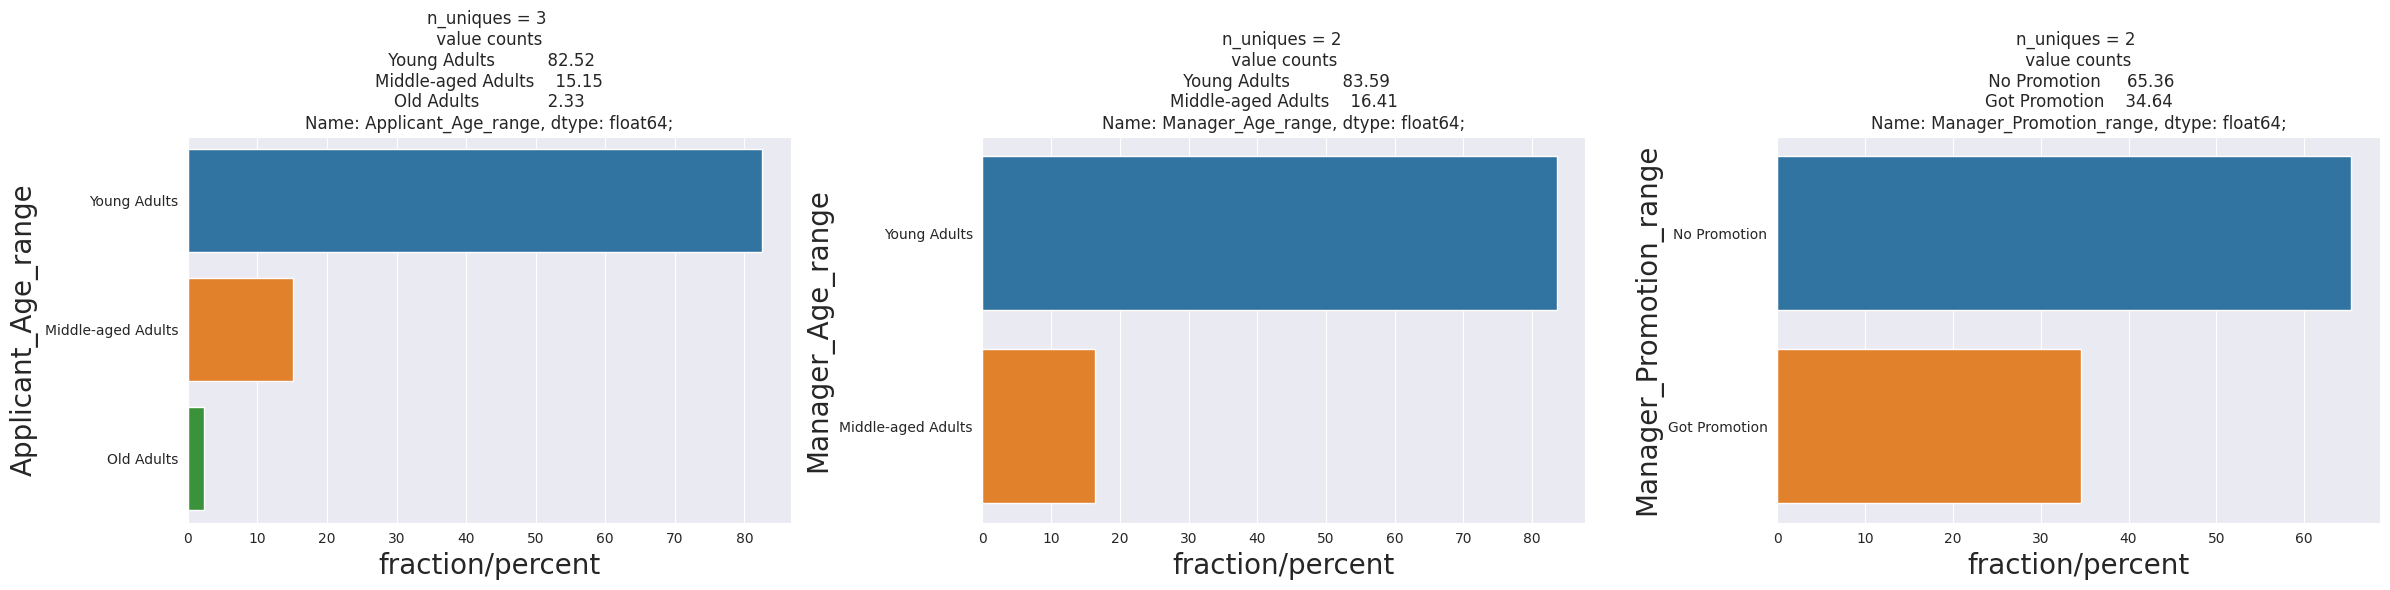

In [ ]:
UVA_category(dataset, ['Applicant_Age_range', 'Manager_Age_range', 'Manager_Promotion_range'])  

###  BIVARIATE ANALYSIS

#### 1. NUMERICAL - NUMERICAL

In [ ]:
numerical = dataset.select_dtypes(include=['int64','float64'])[:]


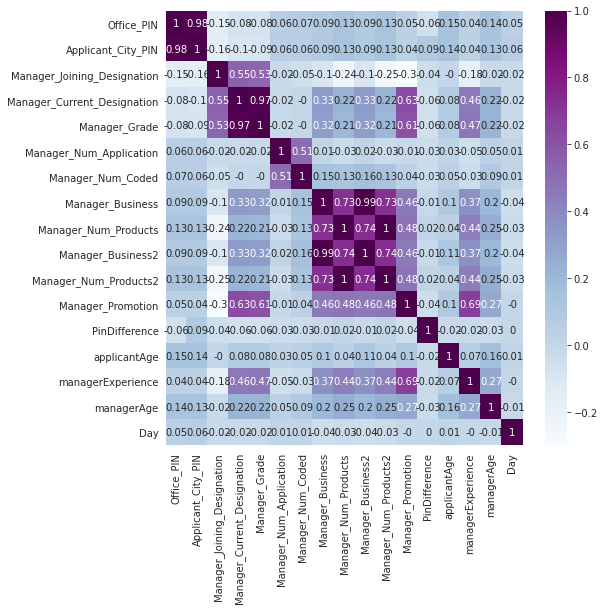

In [ ]:
rounded = round(dataset.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

#### 2.NUMERICAL - CATEGORICAL

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

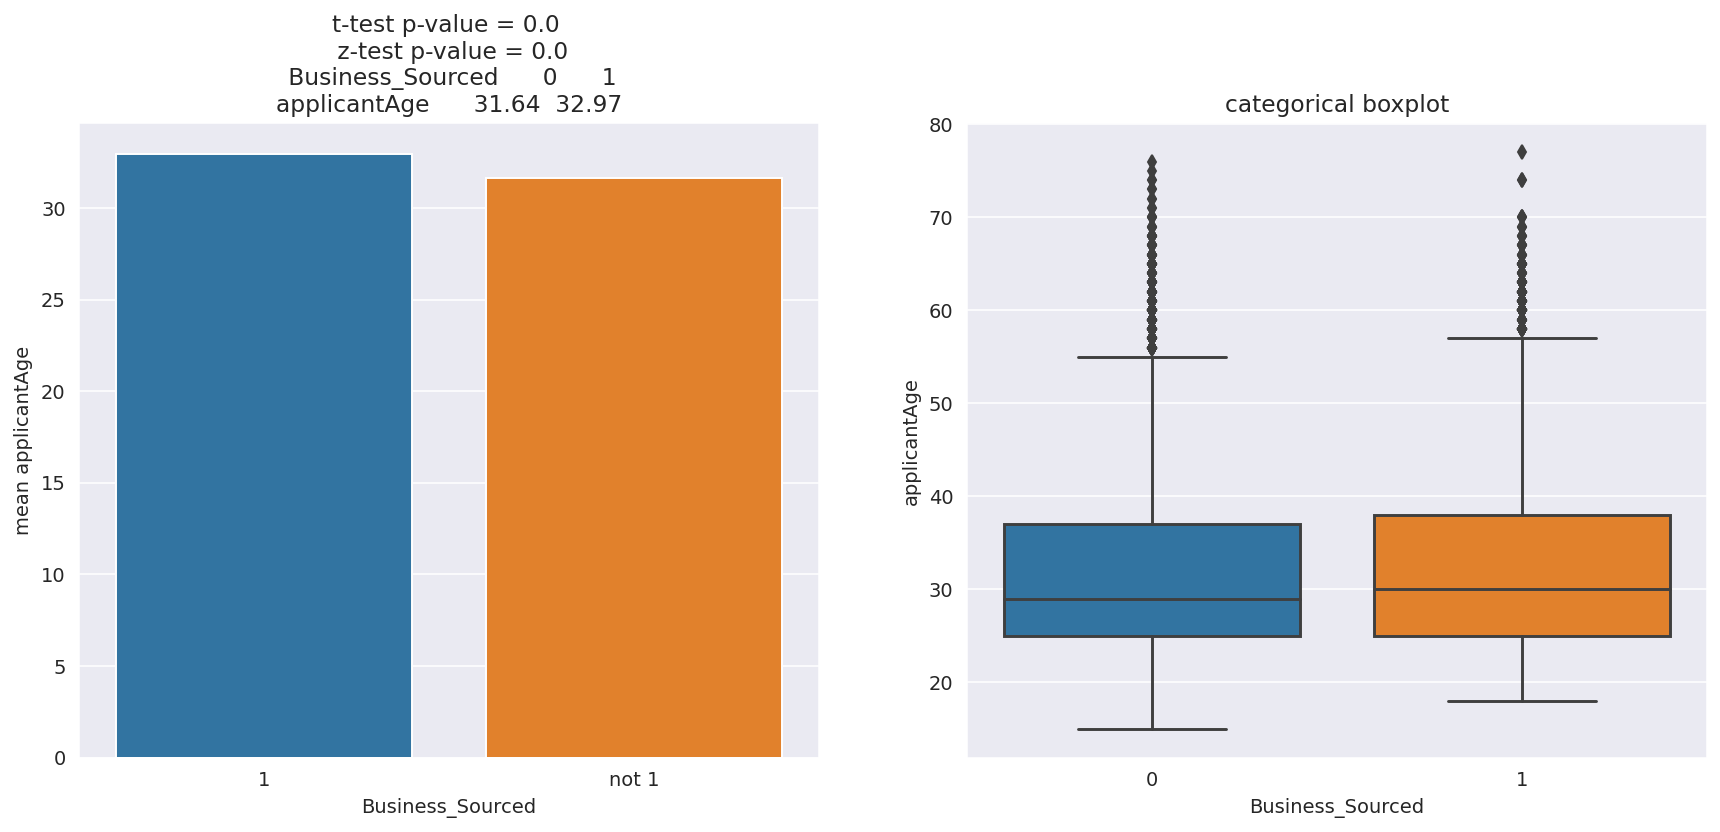

In [ ]:
Bivariate_cont_cat(dataset, 'applicantAge', 'Business_Sourced', 1)

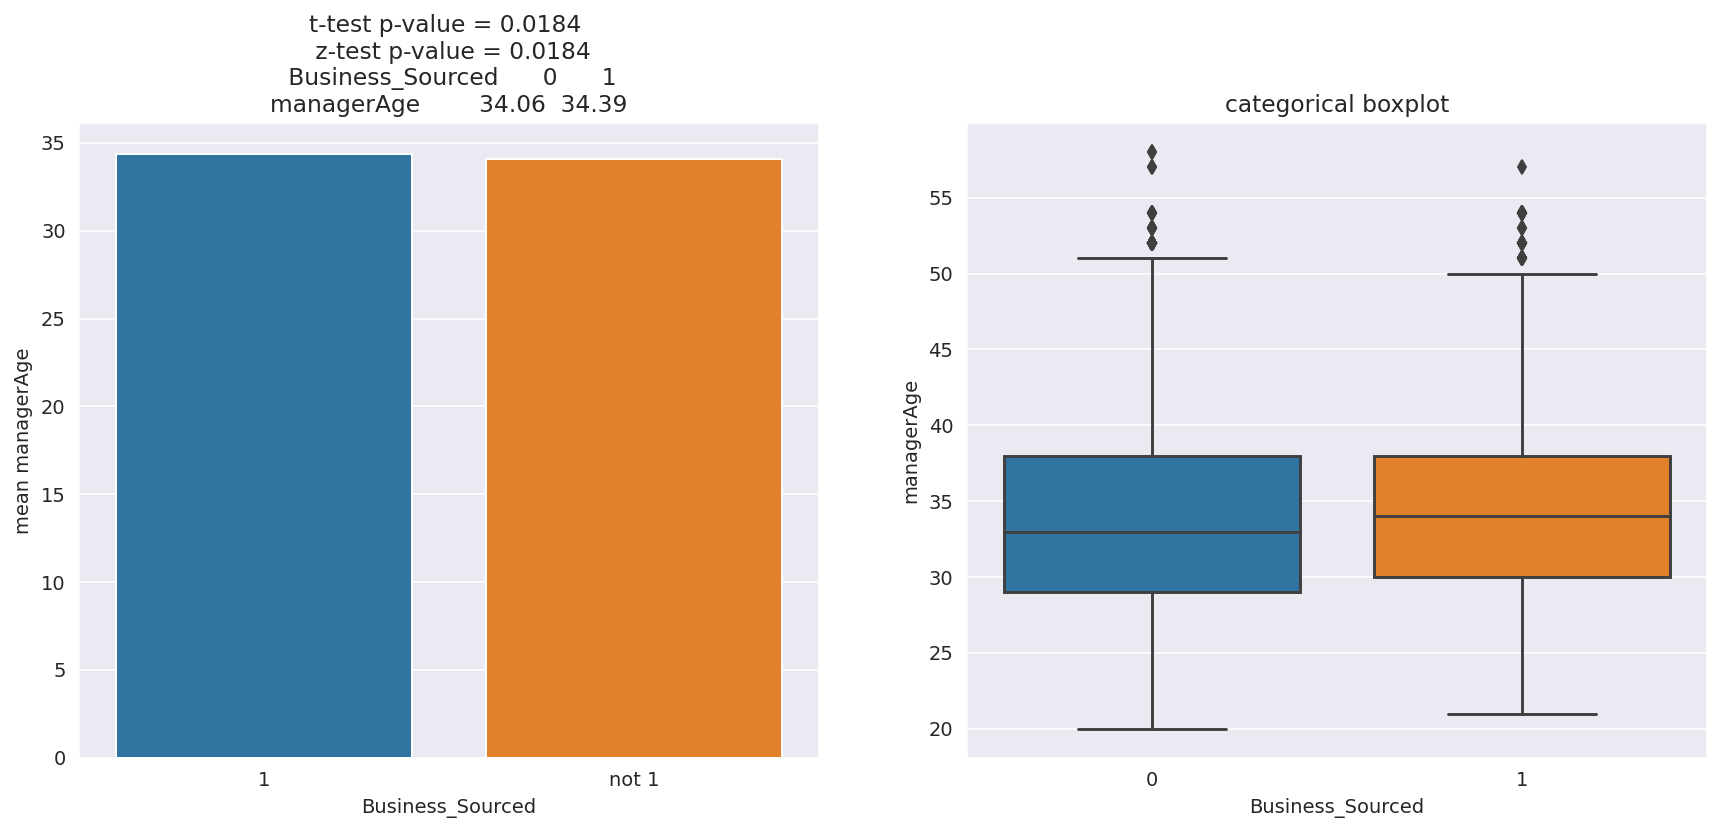

In [ ]:
Bivariate_cont_cat(dataset, 'managerAge', 'Business_Sourced', 1)

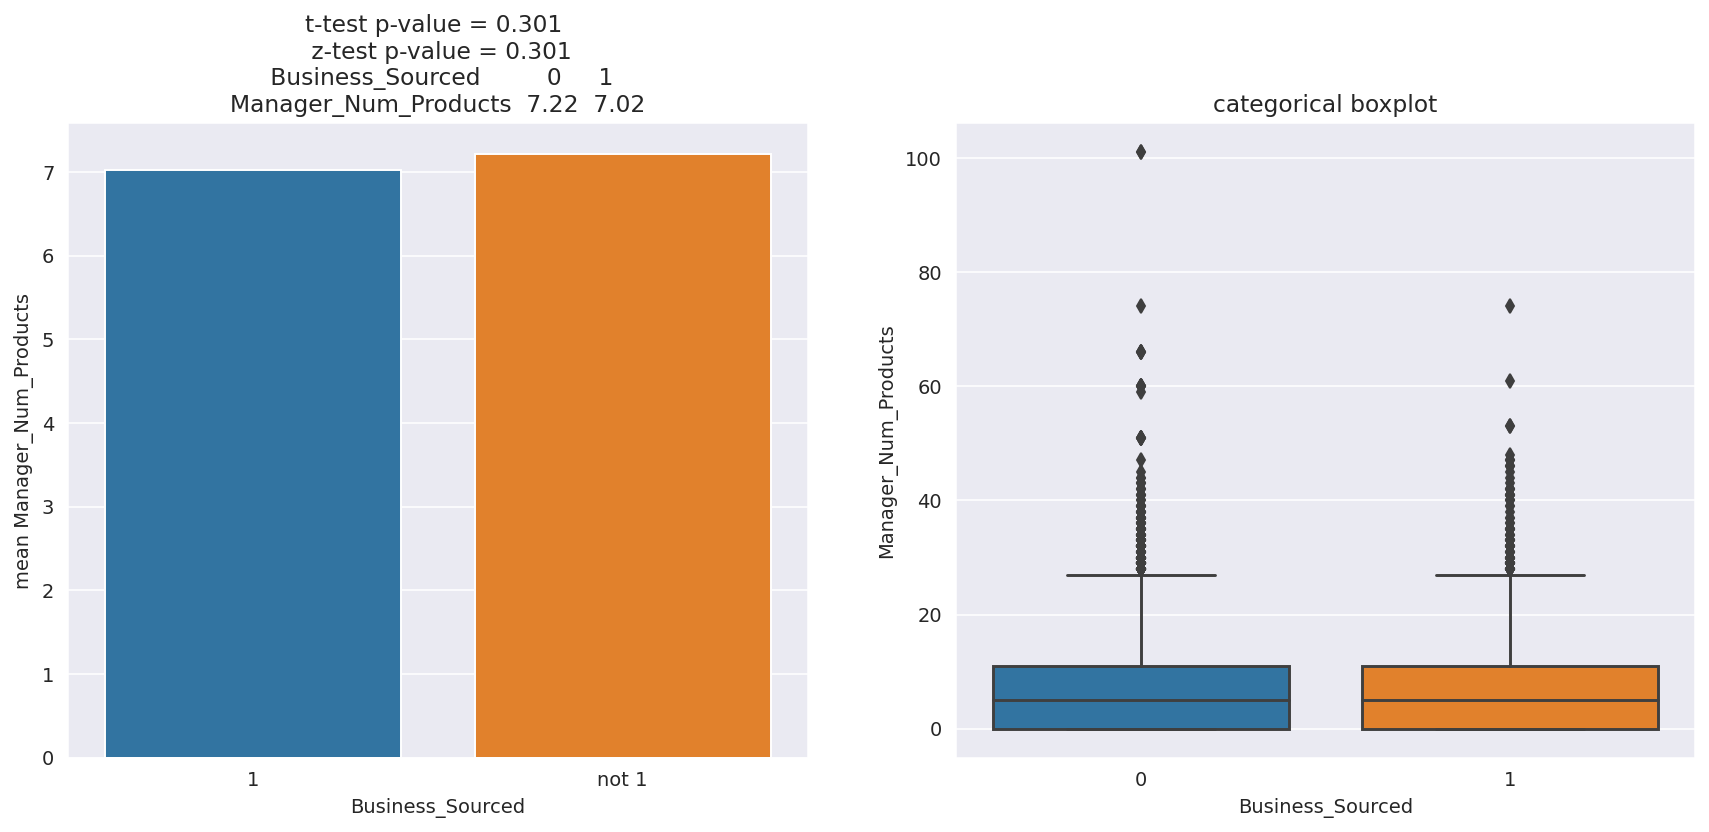

In [ ]:
Bivariate_cont_cat(dataset, 'Manager_Num_Products', 'Business_Sourced', 1)

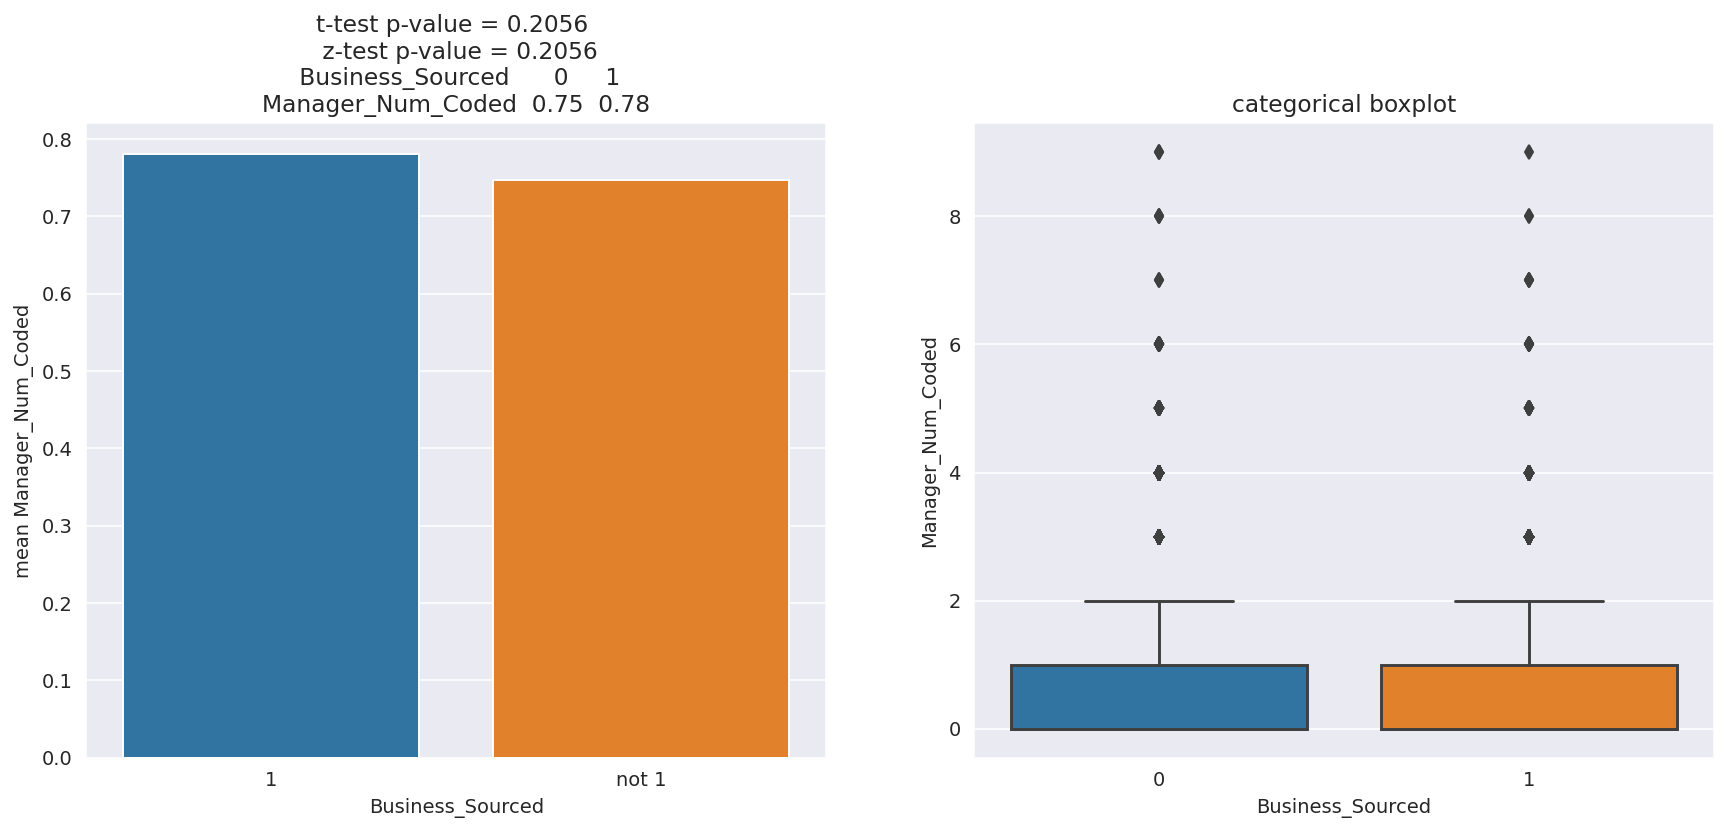

In [ ]:
Bivariate_cont_cat(dataset, 'Manager_Num_Coded', 'Business_Sourced', 1)

#### 3.CATEGORICAL - CATEGORICAL

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day,Applicant_Age_range,Manager_Age_range,Manager_Promotion_range,WeekDay,PinDifference_range,managerExperience_range,Manager_Business_range
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,0,1,2119,35,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away,Less Experience,More Business
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,1,1,2110,24,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away,Less Experience,More Business
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2,Confirmation,M,1969-03-03,0,0,357184.0,24,357184.0,24,0,0,44100,41,0,38,0,Middle-aged Adults,Young Adults,No Promotion,0,Stay Far away,Less Experience,More Business
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4,Confirmation,F,1978-08-14,0,0,318356.0,22,318356.0,22,0,2,0,19,3,28,0,Young Adults,Young Adults,Got Promotion,0,Stay Nearby,More Experience,More Business
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2,Confirmation,M,1971-02-07,2,1,230402.0,17,230402.0,17,0,0,1239,21,0,36,0,Young Adults,Young Adults,No Promotion,0,Stay Far away,Less Experience,More Business


In [ ]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

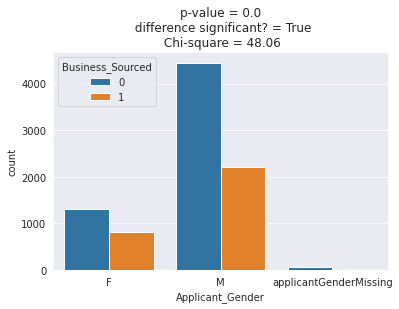

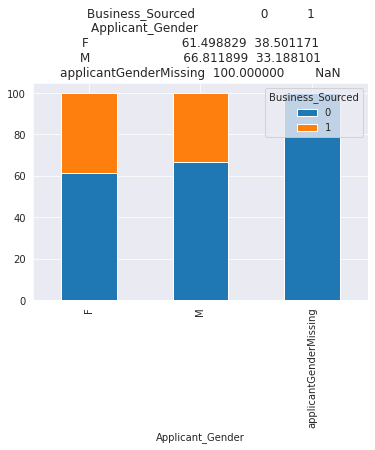

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Applicant_Gender')

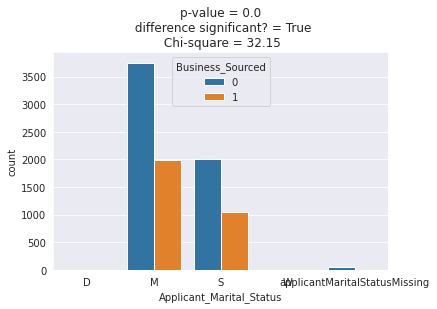

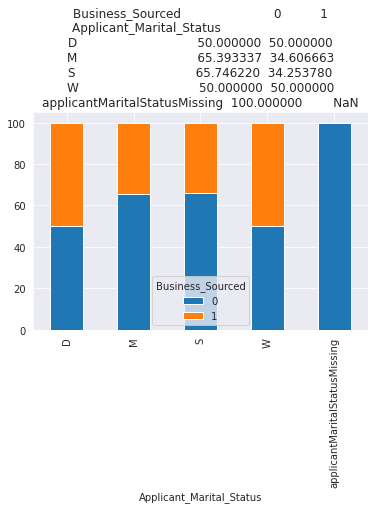

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Applicant_Marital_Status')

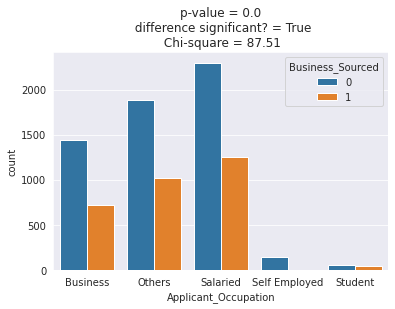

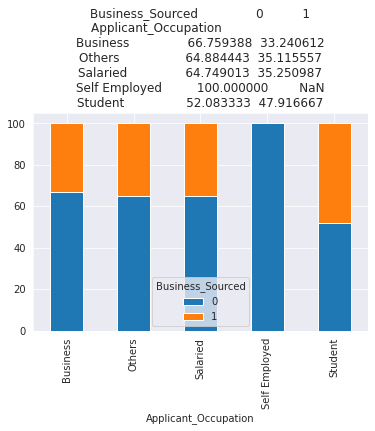

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Applicant_Occupation')

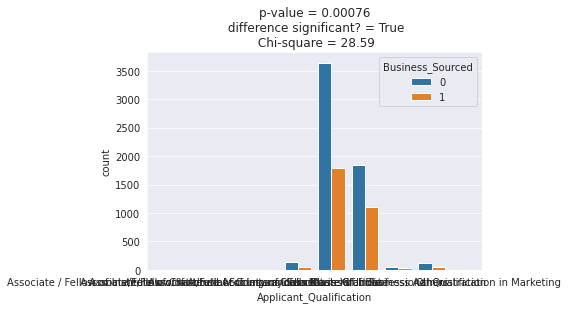

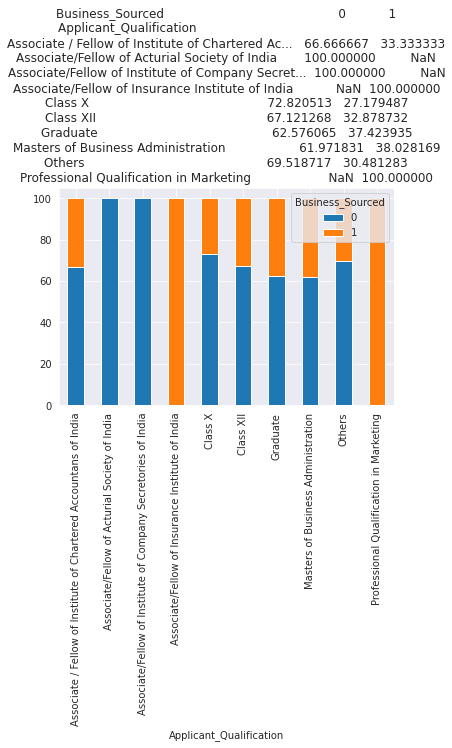

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Applicant_Qualification')

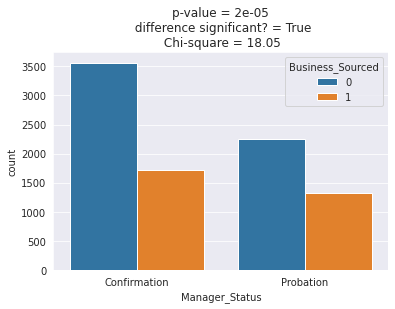

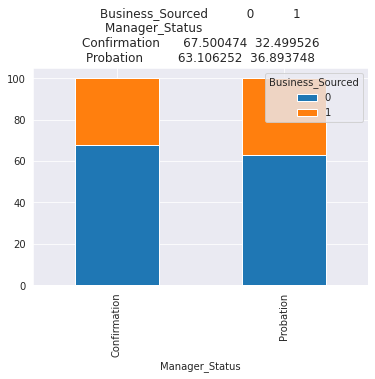

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Manager_Status')

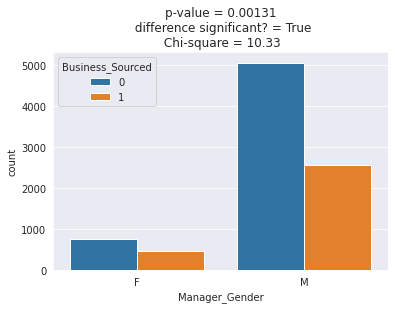

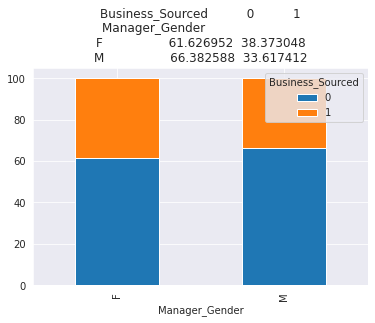

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Manager_Gender')

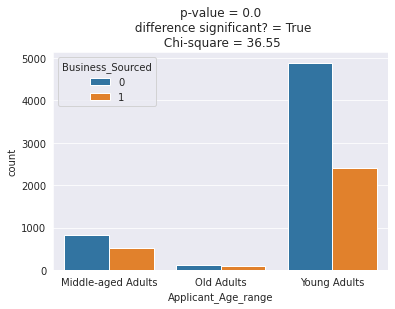

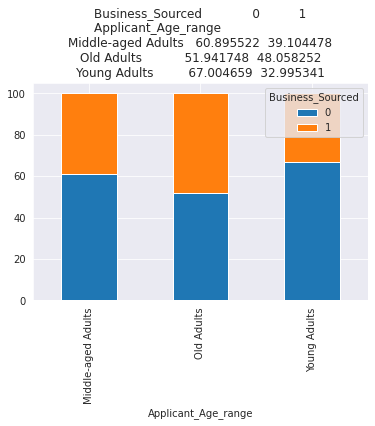

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Applicant_Age_range')

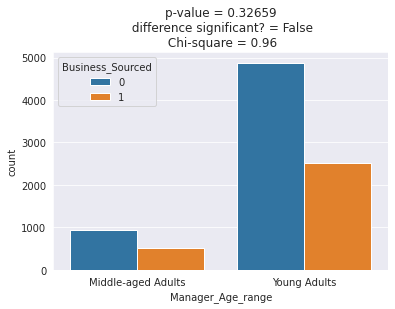

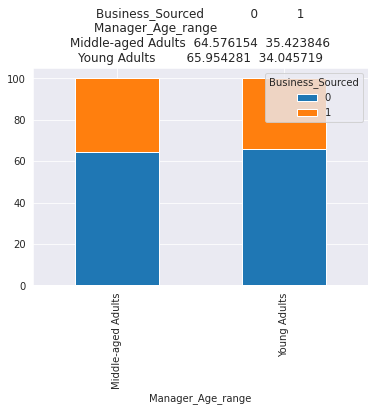

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Manager_Age_range')

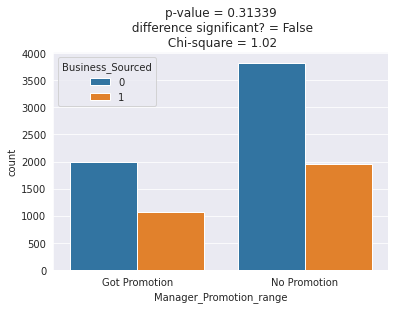

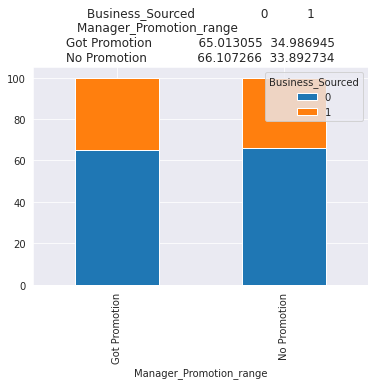

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Manager_Promotion_range')

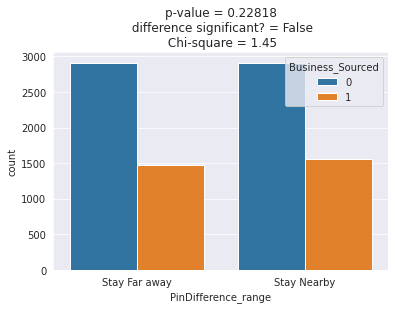

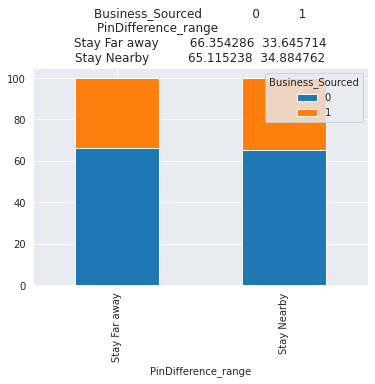

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'PinDifference_range')

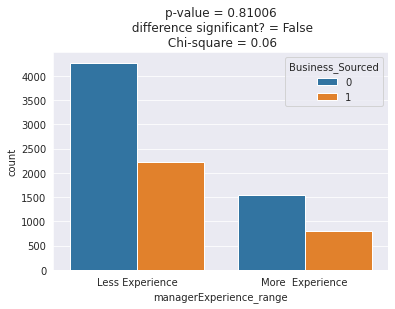

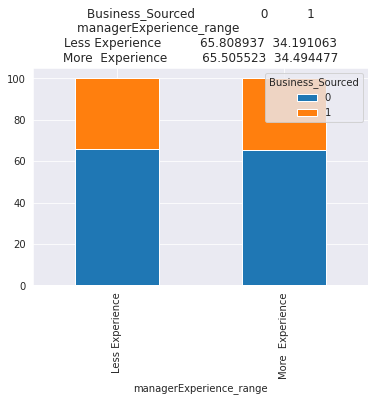

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'managerExperience_range')

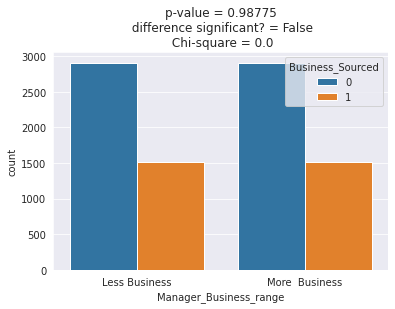

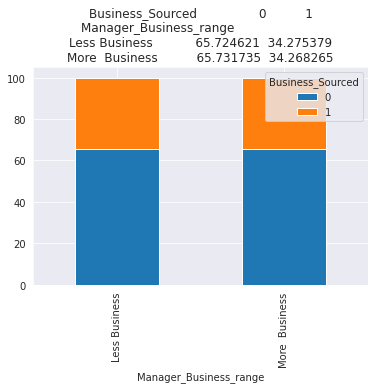

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'Manager_Business_range')

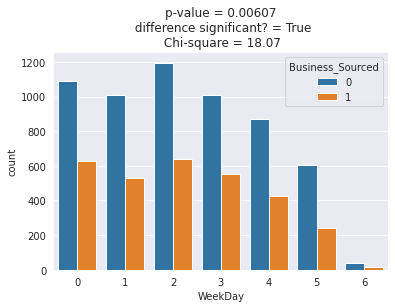

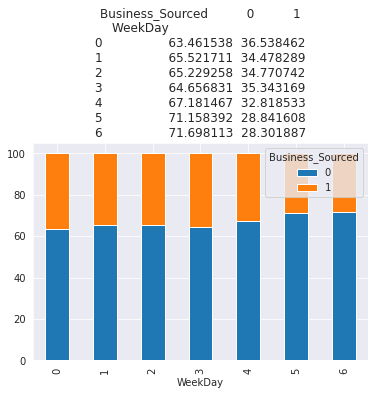

In [ ]:
BVA_categorical_plot(dataset, 'Business_Sourced', 'WeekDay')

###  MULTIVARIATE ANALYSIS

In [ ]:
dataset['Target_variable'] = dataset['Business_Sourced'].astype('int64')

In [ ]:
dataset['Target_variable_2'] = 0
dataset['Target_variable_2'][(dataset['Target_variable']== 1)] = 0
dataset['Target_variable_2'][(dataset['Target_variable']!= 1)] = 1

In [ ]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Manager_Promotion,PinDifference,applicantAge,managerExperience,managerAge,Day,Applicant_Age_range,Manager_Age_range,Manager_Promotion_range,WeekDay,PinDifference_range,managerExperience_range,Manager_Business_range,Target_variable,Target_variable_2
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,0,1,2119,35,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away,Less Experience,More Business,0,1
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1.0,2.0,3,Confirmation,M,1978-02-17,2,1,335249.0,28,335249.0,28,1,1,2110,24,1,29,0,Young Adults,Young Adults,Got Promotion,0,Stay Far away,Less Experience,More Business,1,0
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1.0,1.0,2,Confirmation,M,1969-03-03,0,0,357184.0,24,357184.0,24,0,0,44100,41,0,38,0,Middle-aged Adults,Young Adults,No Promotion,0,Stay Far away,Less Experience,More Business,0,1
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1.0,3.0,4,Confirmation,F,1978-08-14,0,0,318356.0,22,318356.0,22,0,2,0,19,3,28,0,Young Adults,Young Adults,Got Promotion,0,Stay Nearby,More Experience,More Business,0,1
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1.0,1.0,2,Confirmation,M,1971-02-07,2,1,230402.0,17,230402.0,17,0,0,1239,21,0,36,0,Young Adults,Young Adults,No Promotion,0,Stay Far away,Less Experience,More Business,0,1


#### 1.Gender, Age_range, Occupation

In [ ]:
dataset.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Age_range'], 'Applicant_Occupation', aggfunc='mean')*100

Applicant_Occupation                         Business  ...    Student
Applicant_Gender       Applicant_Age_range             ...           
F                      Middle-aged Adults   28.571429  ...   0.000000
                       Old Adults           50.000000  ...        NaN
                       Young Adults         36.594203  ...  66.666667
M                      Middle-aged Adults   37.254902  ...        NaN
                       Old Adults           57.142857  ...        NaN
                       Young Adults         31.721854  ...  37.288136
applicantGenderMissing Young Adults               NaN  ...        NaN

[7 rows x 5 columns]

#### 2.Gender, Avg_Account_Balance_range,  Occupation





In [ ]:
GEA = dataset.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Age_range'], 'Applicant_Marital_Status', aggfunc='mean')*100
round(GEA,2)

Applicant_Marital_Status                        D  ...  applicantMaritalStatusMissing
Applicant_Gender       Applicant_Age_range         ...                               
F                      Middle-aged Adults     NaN  ...                            0.0
                       Old Adults             NaN  ...                            NaN
                       Young Adults          50.0  ...                            0.0
M                      Middle-aged Adults     0.0  ...                            NaN
                       Old Adults             NaN  ...                            0.0
                       Young Adults         100.0  ...                            0.0
applicantGenderMissing Young Adults           NaN  ...                            0.0

[7 rows x 5 columns]

###  CONCLUSION

*   Applicant whose Gender is missing are **less likely** to source any business.
*   Applicant whose Marital status  is missing are **less likely** to source any business.
*   Applicant whose Marital status  is  Divorced or widowed are **more likely** to source any business.
*   Applicant who are self employed are **less likely** to source any business.
*   Applicant who are students are **more likely** to source any business.
*   Young Applicants(<= 40 years)  are **less likely** to source any business.
*   Old aged  Applicants(>60 years) are **more likely** to source any business.
*   Applications that are received in Monday  are **more likely** to source any business.
*   Applications that are received in Sunday  are **less likely** to source any business.
*   Applicants whose Manager is in probation are **more likely** to source any business.
*   Manager_Age_range,Manager_Promotion_range,PinDifference_range,managerExperience_range,Manager_Business_range **does not have a significant impact** on business being sourced.

